In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn import model_selection
from sklearn.model_selection import train_test_split
#Import segala library yg dibutuhkan

In [2]:
dataset = pd.read_csv('dataset/train.csv')
dataset.head()
#masukin data training sebagai dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dataset.info()
#Melihat info dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
dataset.describe()
#Melihat deskripsi dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
dataset.isnull().any()
#Mengechek adakah nilai null/missing

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [6]:
dataset['price_range'].value_counts()
# Melihat berapa banyak jumlah per range harga

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [7]:
x = dataset.iloc[:,:20]
y = dataset.iloc[:,20:]

In [8]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [9]:
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [10]:
print(x.shape)
print(y.shape)

(2000, 20)
(2000, 1)


In [11]:
best_feature = SelectKBest(chi2, k= 10)
fit = best_feature.fit(x,y)

In [12]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [13]:
score_list = pd.concat([dfcolumns, dfscores], axis=1)
score_list.columns = ["features","scores"]

In [14]:
score_list

,features,scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [15]:
print(score_list.nlargest(10,"scores"))

         features         scores
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [16]:
dataset.drop(dataset.columns[[1,2,3,5,7,9,10,17,18,19,6,15,16,4,14]],axis=1,inplace=True)

In [17]:
dataset.head()

,battery_power,mobile_wt,px_height,px_width,ram,price_range
0,842,188,20,756,2549,1
1,1021,136,905,1988,2631,2
2,563,145,1263,1716,2603,2
3,615,131,1216,1786,2769,2
4,1821,141,1208,1212,1411,1


In [18]:
dataset.tail()

,battery_power,mobile_wt,px_height,px_width,ram,price_range
1995,794,106,1222,1890,668,0
1996,1965,187,915,1965,2032,2
1997,1911,108,868,1632,3057,3
1998,1512,145,336,670,869,0
1999,510,168,483,754,3919,3


In [19]:
x = dataset.iloc[:,0:5].values
y = dataset.iloc[:,5:].values

In [20]:
x

array([[ 842,  188,   20,  756, 2549],
       [1021,  136,  905, 1988, 2631],
       [ 563,  145, 1263, 1716, 2603],
       ...,
       [1911,  108,  868, 1632, 3057],
       [1512,  145,  336,  670,  869],
       [ 510,  168,  483,  754, 3919]], dtype=int64)

In [21]:
y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]], dtype=int64)

In [22]:
#mengaplikasikan cross validation technique di beberapa model
#Random Forest Classifier
skfold = StratifiedKFold(n_splits=12,random_state=0)
model_rf = RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0, n_jobs=1)
results_skfold = model_selection.cross_val_score(model_rf,x,y.ravel(), cv=skfold)
print("Accuracy : %.2f%%" % (results_skfold.mean()*100.0))

Accuracy : 92.20%


In [23]:
#KNN Classifier
skfold = StratifiedKFold(n_splits=12,random_state=0)
model_knn = KNeighborsClassifier(n_neighbors=15)
results_skfold = model_selection.cross_val_score(model_knn, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 93.85%


In [24]:
# Decision Tree Classifier
skfold = StratifiedKFold(n_splits=12,random_state=0)
model_c = DecisionTreeClassifier()
results_skfold = model_selection.cross_val_score(model_c, x, y.ravel(), cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

Accuracy: 85.25%


In [25]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 5)
(400, 5)
(1600, 1)
(400, 1)


In [27]:
#Pembuatan Model
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(X_test)
accuracy_score(y_pred,y_test)

0.955

<function matplotlib.pyplot.show(close=None, block=None)>

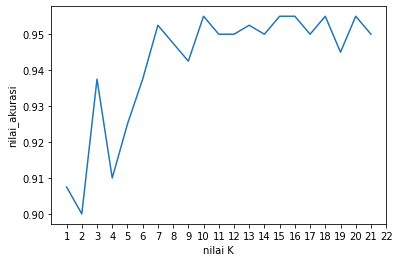

In [28]:
array_hasil = []
for i in range(1,22):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train.ravel())
    y_pred = knn.predict(X_test)
    hasil = accuracy_score(y_pred,y_test)
    array_hasil.append(hasil)

plt.plot(array_hasil)
plt.ylabel('nilai_akurasi')
plt.xlabel('nilai K')
plt.xticks(np.arange(22),('1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22'))
plt.show

In [29]:
datatest = pd.read_csv("dataset/test.csv")
datatest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [30]:
real_datatest = datatest.drop(datatest.columns[[0,2,3,4,6,8,10,11,18,19,20,7,16,17,5,15]],axis=1)
real_datatest.head()

,battery_power,mobile_wt,px_height,px_width,ram
0,1043,193,226,1412,3476
1,841,191,746,857,3895
2,1807,186,1270,1366,2396
3,1546,96,295,1752,3893
4,1434,108,749,810,1773


In [31]:
dataset.head()

,battery_power,mobile_wt,px_height,px_width,ram,price_range
0,842,188,20,756,2549,1
1,1021,136,905,1988,2631,2
2,563,145,1263,1716,2603,2
3,615,131,1216,1786,2769,2
4,1821,141,1208,1212,1411,1


In [32]:
predicted_price = knn.predict(real_datatest)

In [33]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 2, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [34]:
datatest['price_range']=predicted_price
datatest

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,...,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,38,832,2509,15,11,6,0,1,0,2
